In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets  import load_iris

In [2]:
data=load_iris()

In [9]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\nentropy = 0.918\nsa

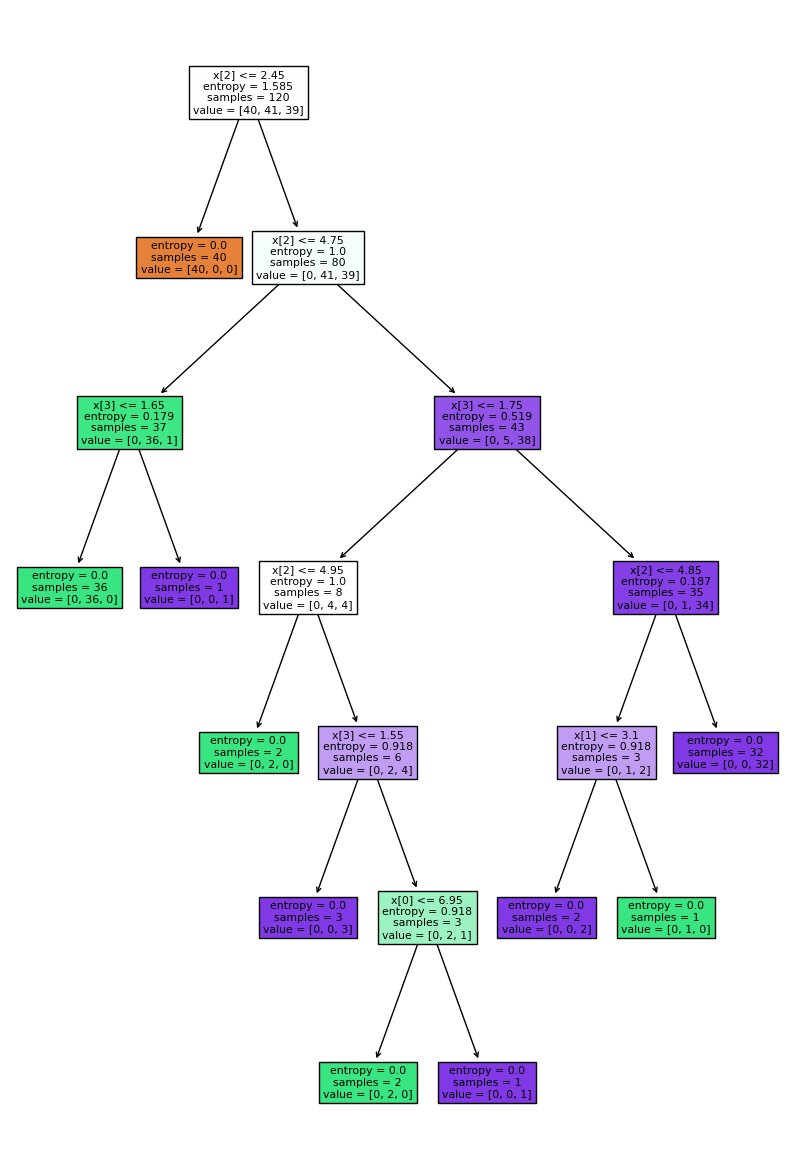

In [21]:
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(classifier,filled=True)

## post pruning

[Text(0.375, 0.875, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.25, 0.375, 'x[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'entropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]')]

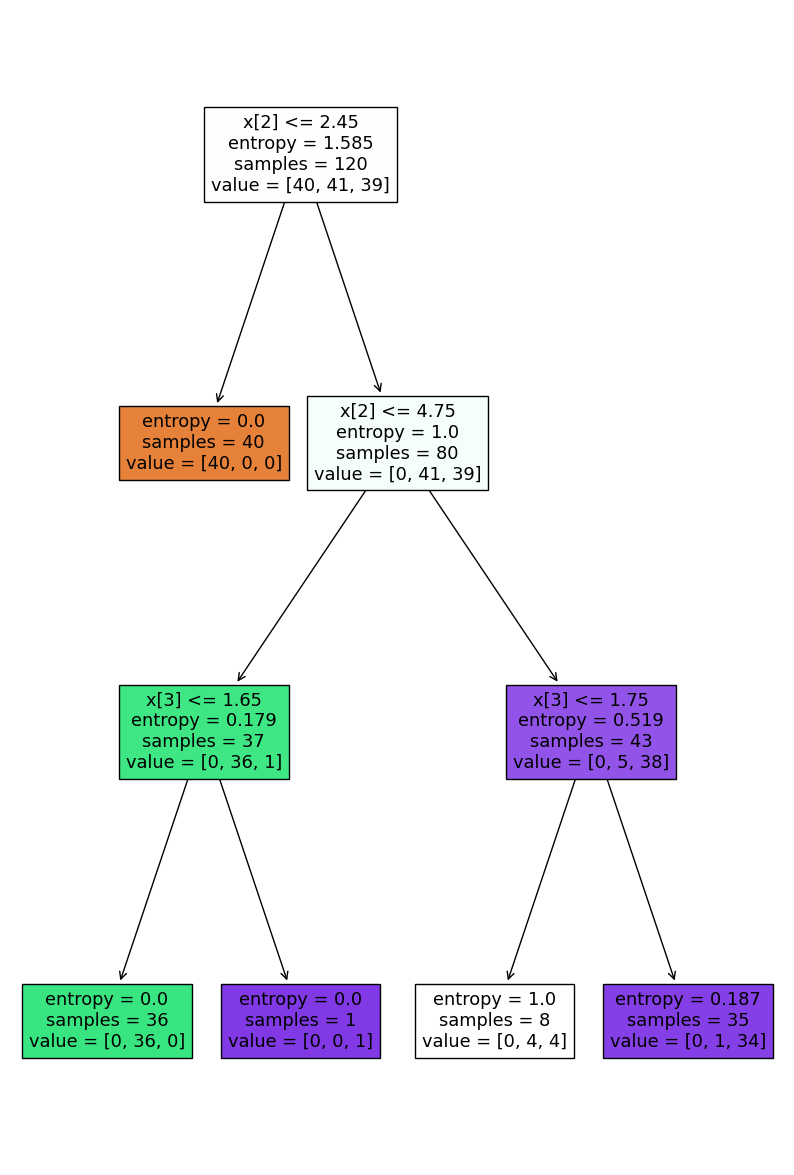

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=3)
classifier.fit(x_train,y_train)
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(classifier,filled=True)

In [23]:
y_pred=classifier.predict(x_test)

In [24]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [32]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
print(accuracy_score(y_pred,y_test))

1.0


## DecisionTree prepruning and Hyperparameter tuning for large dataset

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
parameter={'criterion':['gini', 'entropy', 'log_loss'],
           'splitter':['best', 'random'],
           'max_depth':[1,2,3,4,5],
           'max_features':['sqrt', 'log2']
          
          }

In [40]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()
cv=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [41]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [42]:
y_pred=cv.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0
